### Overview
This one focuses on data extraction, cleaning, and visualization tasks using data sourced from **krisha.com**, a platform  related to real estate. The notebook implements a pipeline to parse the data, clean it for usability, and generate insightful visualizations.

In [1]:
import numpy as np
import pandas as pd
import warnings
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
bost = pd.read_csv("podrob_bost_krisha.csv")
almal = pd.read_csv("podrob_almal_krisha.csv")
naur = pd.read_csv("podrob_nauryzb_krisha.csv")
qas = pd.read_csv("podrob_qas_krisha.csv")
auez = pd.read_csv("podrob_auezov_krisha.csv")

In [3]:
warnings.filterwarnings("ignore")

# CLEANING

In [4]:
all_houses = pd.concat([bost,almal,naur,qas,auez])
all_houses.head(5)

,Room,Area,Floor,Price,Security,Location,Zhk,Studio_kitchen,Previous_dorm,Furniture,State,Deep_info_furniture,Flat_facilities,Separated_toilet,Toilet_count,Bathroom,Window_side,Balcony_count,Loggia_count,Who_can_stay
0,1-комнатная квартира,"32 м², Площадь кухни — 6 м²",2 из 4,180 000 〒\n/ месяц,NaN,"Алматы, Бостандыкский р-н\nпоказать на карте",NaN,NaN,нет,полностью,NaN,NaN,NaN,NaN,NaN,ванна,во двор,1,NaN,NaN
1,2-комнатная квартира,60 м²,4 из 17,320 000 〒\n/ месяц,NaN,"Алматы, Бостандыкский р-н\nпоказать на карте",RAMS CITY,да,NaN,полностью,"свежий ремонт, новая мебель",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2-комнатная квартира,61 м²,3 из 12,330 000 〒\n/ месяц,NaN,"Алматы, Бостандыкский р-н\nпоказать на карте",Four Seasons,NaN,нет,полностью,"свежий ремонт, новая мебель","кровать, обеденный стол, шкаф для одежды, кухо...","интернет, телевизор, стиральная машина, холоди...",совмещен,1.0,NaN,во двор,NaN,NaN,NaN
3,2-комнатная квартира,45 м²,4 из 6,230 000 〒\n/ месяц,NaN,"Алматы, Бостандыкский р-н\nпоказать на карте",Аскар Тау,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2-комнатная квартира,"44 м², Площадь кухни — 6 м²",1 из 4,450 000 〒\n/ месяц,"домофон, видеонаблюдение, решетки на окнах","Алматы, Бостандыкский р-н\nпоказать на карте",NaN,NaN,нет,полностью,"свежий ремонт, новая мебель","шкаф для одежды, рабочий стол, кухонный гарнит...","интернет, холодильник, стиральная машина, теле...",совмещен,1.0,ванна,на улицу,нет,нет,"семейной паре, некурящим, одному человеку"


In [5]:
all_houses.duplicated().sum()
all_houses = all_houses.drop_duplicates()

In [6]:
all_houses.duplicated().sum()

0

In [265]:
all_houses['Room'] = all_houses['Room'].str.extract(r'(\d+)').astype(int)
all_houses['Area'] = all_houses['Area'].str.extract(r'(\d+)').astype(int)
all_houses['Price'] = all_houses['Price'].str.extract(r'(\d+)').astype(int)


In [267]:
all_houses.head(5)

,Room,Area,Floor,Price,Security,Location,Zhk,Studio_kitchen,Previous_dorm,Furniture,State,Deep_info_furniture,Flat_facilities,Separated_toilet,Toilet_count,Bathroom,Window_side,Balcony_count,Loggia_count,Who_can_stay
0,1,32,2 из 4,180,NaN,"Алматы, Бостандыкский р-н\nпоказать на карте",NaN,NaN,нет,полностью,NaN,NaN,NaN,NaN,NaN,ванна,во двор,1,NaN,NaN
1,2,60,4 из 17,320,NaN,"Алматы, Бостандыкский р-н\nпоказать на карте",RAMS CITY,да,NaN,полностью,"свежий ремонт, новая мебель",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,61,3 из 12,330,NaN,"Алматы, Бостандыкский р-н\nпоказать на карте",Four Seasons,NaN,нет,полностью,"свежий ремонт, новая мебель","кровать, обеденный стол, шкаф для одежды, кухо...","интернет, телевизор, стиральная машина, холоди...",совмещен,1.0,NaN,во двор,NaN,NaN,NaN
3,2,45,4 из 6,230,NaN,"Алматы, Бостандыкский р-н\nпоказать на карте",Аскар Тау,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2,44,1 из 4,450,"домофон, видеонаблюдение, решетки на окнах","Алматы, Бостандыкский р-н\nпоказать на карте",NaN,NaN,нет,полностью,"свежий ремонт, новая мебель","шкаф для одежды, рабочий стол, кухонный гарнит...","интернет, холодильник, стиральная машина, теле...",совмещен,1.0,ванна,на улицу,нет,нет,"семейной паре, некурящим, одному человеку"


In [269]:
all_houses['Price'] = all_houses['Price'] * 1000


In [271]:
all_houses[['Security', 'State', 'Deep_info_furniture', 'Flat_facilities', 'Window_side']] = all_houses[['Security', 'State', 'Deep_info_furniture', 'Flat_facilities', 'Window_side']].fillna('Unknown')

In [273]:
all_houses[['Security', 'State', 'Deep_info_furniture', 'Flat_facilities', 'Window_side']].isna().sum()

Security               0
State                  0
Deep_info_furniture    0
Flat_facilities        0
Window_side            0
dtype: int64

In [275]:
all_houses['Zhk'] = all_houses['Zhk'].fillna('Not a Zhk')
all_houses['Studio_kitchen'] = all_houses['Studio_kitchen'].fillna('нет')
all_houses['Previous_dorm'] = all_houses['Previous_dorm'].fillna('Unknown')
all_houses['Furniture'] = all_houses['Furniture'].fillna('Unknown')
all_houses['Separated_toilet'] = all_houses['Separated_toilet'].fillna('Unknown')
all_houses['Toilet_count'] = all_houses['Toilet_count'].fillna(1)
all_houses['Balcony_count'] = all_houses['Balcony_count'].fillna(0)
all_houses['Loggia_count'] = all_houses['Loggia_count'].fillna(0)
all_houses['Loggia_count'] = all_houses['Loggia_count'].replace('нет', 0)

In [277]:
all_houses['Who_can_stay'] = all_houses['Who_can_stay'].fillna('Everyone')

In [279]:
all_houses.isna().sum()

Room                     0
Area                     0
Floor                   36
Price                    0
Security                 0
Location                 0
Zhk                      0
Studio_kitchen           0
Previous_dorm            0
Furniture                0
State                    0
Deep_info_furniture      0
Flat_facilities          0
Separated_toilet         0
Toilet_count             0
Bathroom               291
Window_side              0
Balcony_count            0
Loggia_count             0
Who_can_stay             0
dtype: int64

In [281]:
all_houses['Bathroom'] = all_houses['Bathroom'].fillna('Unknown')

In [283]:
all_houses.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2052 entries, 0 to 682
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Room                 2052 non-null   int32  
 1   Area                 2052 non-null   int32  
 2   Floor                2016 non-null   object 
 3   Price                2052 non-null   int32  
 4   Security             2052 non-null   object 
 5   Location             2052 non-null   object 
 6   Zhk                  2052 non-null   object 
 7   Studio_kitchen       2052 non-null   object 
 8   Previous_dorm        2052 non-null   object 
 9   Furniture            2052 non-null   object 
 10  State                2052 non-null   object 
 11  Deep_info_furniture  2052 non-null   object 
 12  Flat_facilities      2052 non-null   object 
 13  Separated_toilet     2052 non-null   object 
 14  Toilet_count         2052 non-null   float64
 15  Bathroom             2052 non-null   object 

In [285]:
all_houses['Balcony_count'] = all_houses['Balcony_count'].replace('нет', 0)

In [287]:
all_houses['Balcony_count'] = all_houses['Balcony_count'].astype(int)
all_houses['Loggia_count'] = all_houses['Loggia_count'].astype(int)
all_houses['Toilet_count'] = all_houses['Toilet_count'].astype(int)

In [289]:
all_houses.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2052 entries, 0 to 682
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Room                 2052 non-null   int32 
 1   Area                 2052 non-null   int32 
 2   Floor                2016 non-null   object
 3   Price                2052 non-null   int32 
 4   Security             2052 non-null   object
 5   Location             2052 non-null   object
 6   Zhk                  2052 non-null   object
 7   Studio_kitchen       2052 non-null   object
 8   Previous_dorm        2052 non-null   object
 9   Furniture            2052 non-null   object
 10  State                2052 non-null   object
 11  Deep_info_furniture  2052 non-null   object
 12  Flat_facilities      2052 non-null   object
 13  Separated_toilet     2052 non-null   object
 14  Toilet_count         2052 non-null   int32 
 15  Bathroom             2052 non-null   object
 16  Window_side 

In [291]:
all_houses = all_houses.dropna(axis=0)

In [293]:
all_houses.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2016 entries, 0 to 682
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Room                 2016 non-null   int32 
 1   Area                 2016 non-null   int32 
 2   Floor                2016 non-null   object
 3   Price                2016 non-null   int32 
 4   Security             2016 non-null   object
 5   Location             2016 non-null   object
 6   Zhk                  2016 non-null   object
 7   Studio_kitchen       2016 non-null   object
 8   Previous_dorm        2016 non-null   object
 9   Furniture            2016 non-null   object
 10  State                2016 non-null   object
 11  Deep_info_furniture  2016 non-null   object
 12  Flat_facilities      2016 non-null   object
 13  Separated_toilet     2016 non-null   object
 14  Toilet_count         2016 non-null   int32 
 15  Bathroom             2016 non-null   object
 16  Window_side 

In [295]:
all_houses[['Efloor', 'Floor_count']] = all_houses['Floor'].str.split(' из ', expand=True)

In [297]:
all_houses['Efloor'] = pd.to_numeric(all_houses['Efloor'])
all_houses['Floor_count'] = pd.to_numeric(all_houses['Floor_count'])

In [299]:
all_houses = all_houses.drop(columns = 'Floor')

In [301]:
all_houses.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2016 entries, 0 to 682
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Room                 2016 non-null   int32  
 1   Area                 2016 non-null   int32  
 2   Price                2016 non-null   int32  
 3   Security             2016 non-null   object 
 4   Location             2016 non-null   object 
 5   Zhk                  2016 non-null   object 
 6   Studio_kitchen       2016 non-null   object 
 7   Previous_dorm        2016 non-null   object 
 8   Furniture            2016 non-null   object 
 9   State                2016 non-null   object 
 10  Deep_info_furniture  2016 non-null   object 
 11  Flat_facilities      2016 non-null   object 
 12  Separated_toilet     2016 non-null   object 
 13  Toilet_count         2016 non-null   int32  
 14  Bathroom             2016 non-null   object 
 15  Window_side          2016 non-null   object 

In [303]:
all_houses.to_csv('all_houses.csv', index = False)

## DATA VISUALISATION

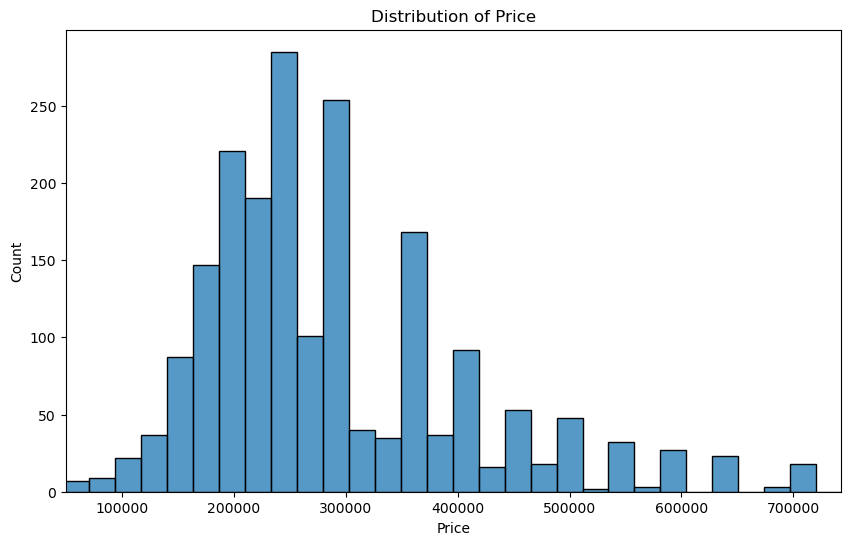

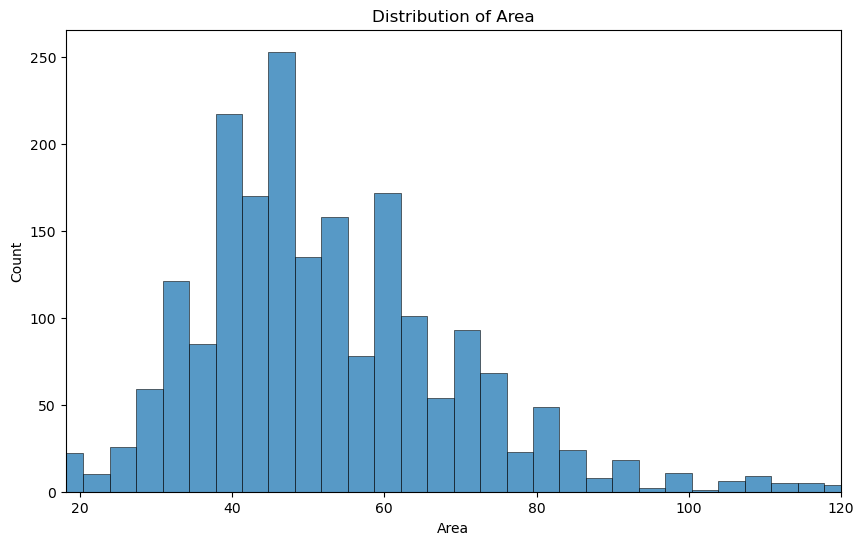

In [247]:
for column in ['Price', 'Area']:
    plt.figure(figsize=(10, 6))
    sns.histplot(all_houses[column])
    plt.title(f'Distribution of {column}')
    plt.xlim(all_houses[column].quantile(0.01), all_houses[column].quantile(0.99))
    plt.show()


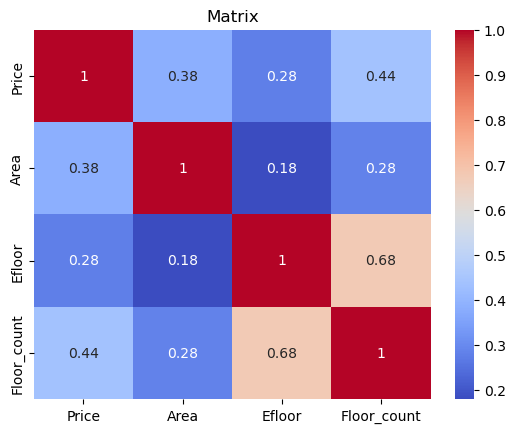

In [180]:
correlation = all_houses[['Price', 'Area', 'Efloor', 'Floor_count']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Matrix')
plt.show()


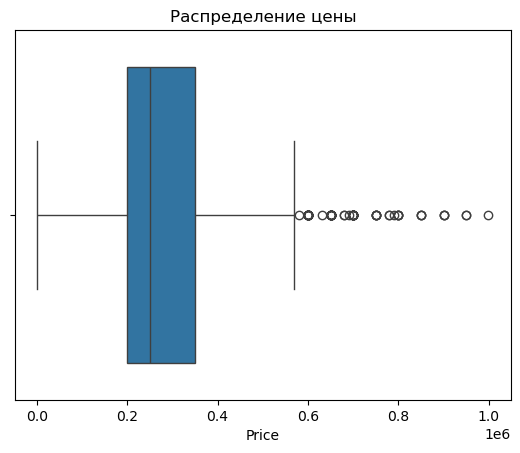

In [190]:
sns.boxplot(x=all_houses['Price'])
plt.title('Price distribution')
plt.show()


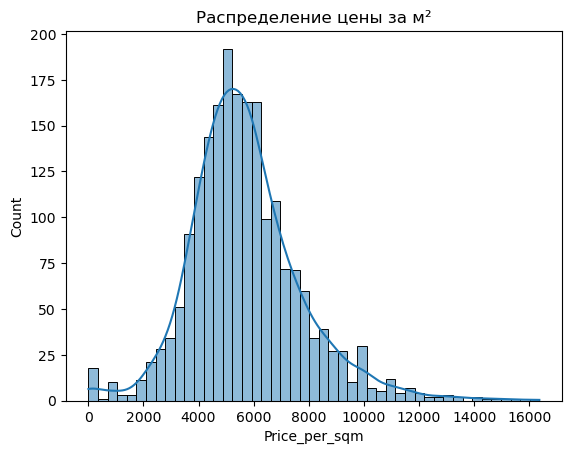

In [198]:
sns.histplot(all_houses['Price_per_sqm'], kde=True)
plt.title('Price distribution per m2')
plt.show()


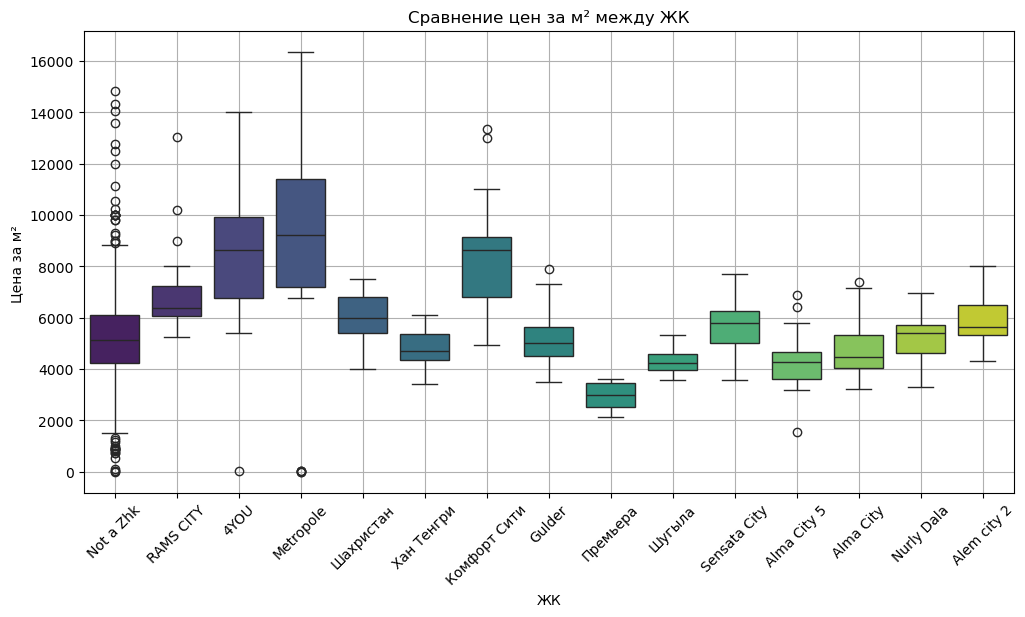

In [245]:
top_zhk = all_houses['Zhk'].value_counts().nlargest(15).index
filtered_data = all_houses[all_houses['Zhk'].isin(top_zhk)]

# Построение графика
plt.figure(figsize=(12, 6))
sns.boxplot(data=filtered_data, x='Zhk', y='Price_per_sqm', palette='viridis')
plt.title('Price comparison per m2 between ЖК')
plt.xlabel('ЖК')
plt.ylabel('Цена за м² ')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


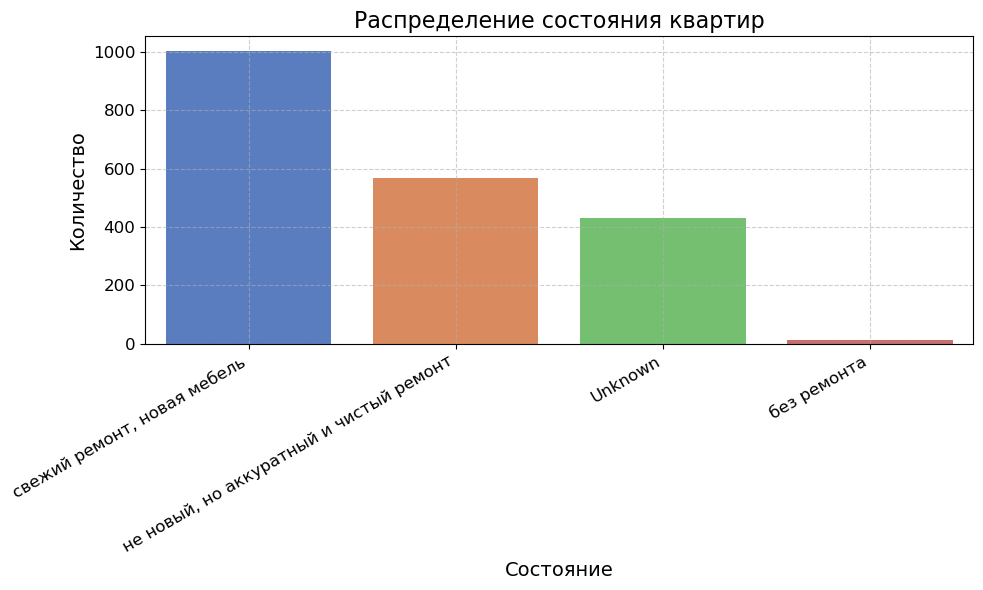

In [213]:
plt.figure(figsize=(10, 6))
sns.barplot(x=state_counts.index, y=state_counts.values, palette='muted')

plt.title('Распределение состояния квартир', fontsize=16)
plt.xlabel('Состояние', fontsize=14)
plt.ylabel('Количество', fontsize=14)

plt.xticks(rotation=30, fontsize=12, ha='right')
plt.yticks(fontsize=12)

plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout() 
plt.show()


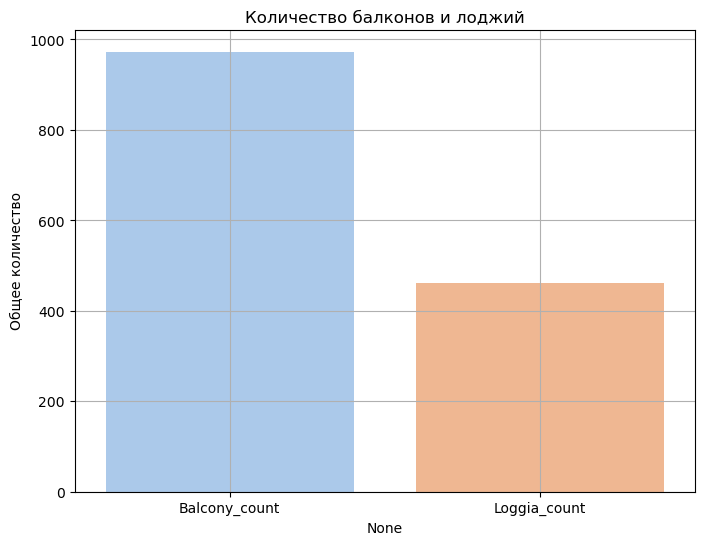

In [227]:
balcony_data = all_houses[['Balcony_count', 'Loggia_count']].sum()

plt.figure(figsize=(8, 6))
sns.barplot(x=balcony_data.index, y=balcony_data.values, palette='pastel')
plt.title('Количество балконов и лоджий')
plt.ylabel('Общее количество')
plt.grid(True)
plt.show()


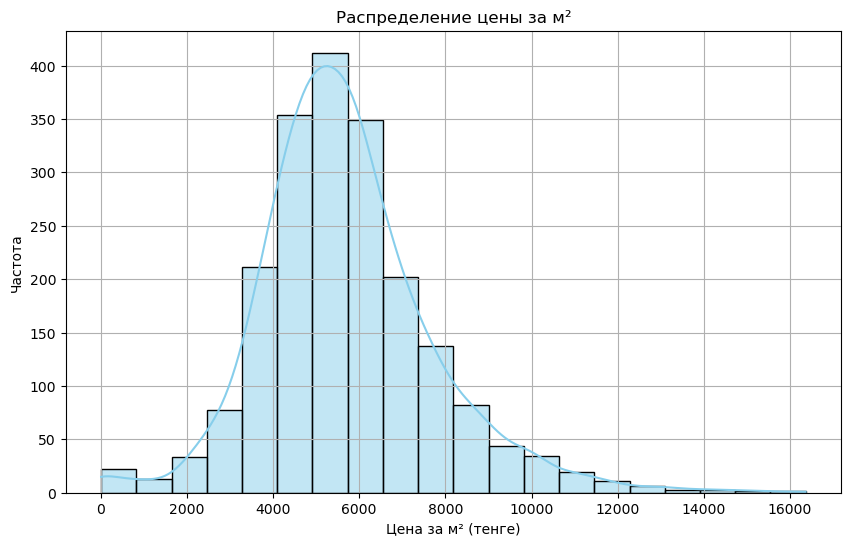

In [229]:
plt.figure(figsize=(10, 6))
sns.histplot(all_houses['Price_per_sqm'], kde=True, bins=20, color='skyblue')
plt.title('Распределение цены за м²')
plt.xlabel('Цена за м² (тенге)')
plt.ylabel('Частота')
plt.grid(True)
plt.show()


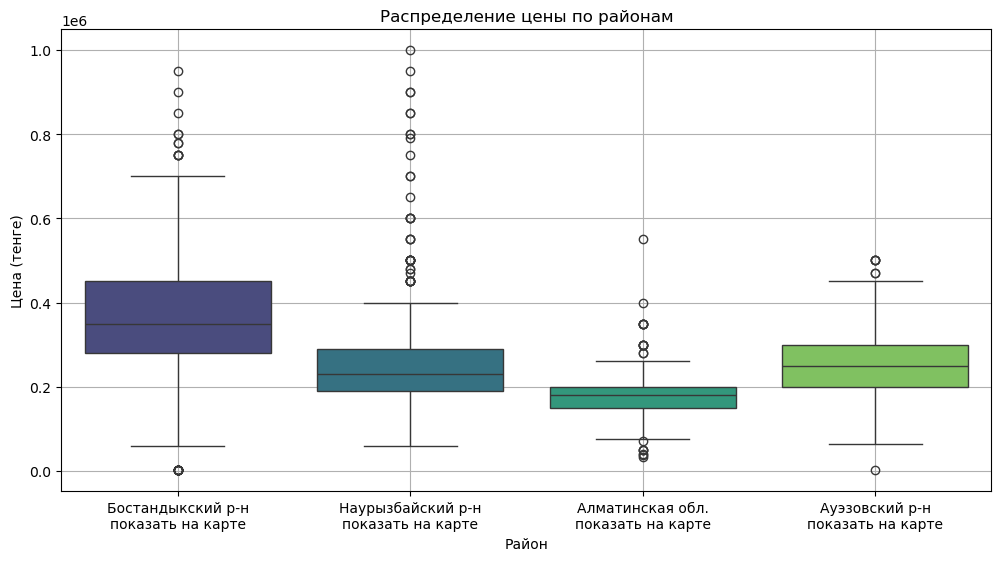

In [231]:
# Добавим фиктивный столбец "Район" для анализа (парсим из 'Location')
all_houses['District'] = all_houses['Location'].str.split(', ').str[1]

plt.figure(figsize=(12, 6))
sns.boxplot(data=all_houses, x='District', y='Price', palette='viridis')
plt.title('Распределение цены по районам')
plt.xlabel('Район')
plt.ylabel('Цена (тенге)')
plt.grid(True)
plt.show()


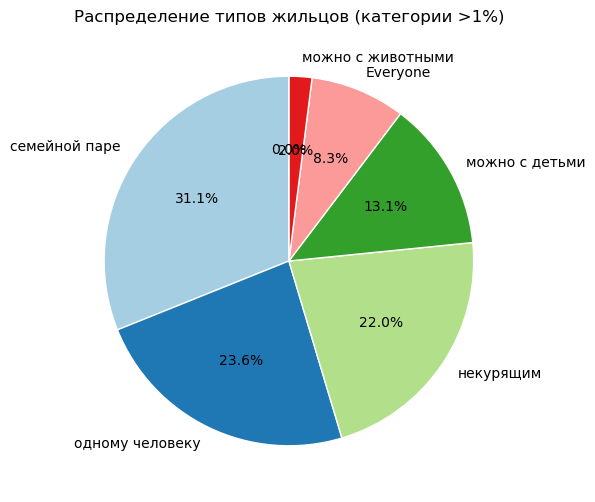

In [337]:
preferences_split = all_houses['Who_can_stay'].str.split(', ', expand=True).stack().reset_index(drop=True)

value_counts = preferences_split.value_counts()
value_counts_percent = (value_counts / value_counts.sum()) * 100

threshold = 0.00001
above_threshold = value_counts_percent[value_counts_percent > threshold]
below_threshold = value_counts_percent[value_counts_percent <= threshold]

final_values = above_threshold.copy()
final_values['Остальные'] = below_threshold.sum()

plt.figure(figsize=(10, 6))
final_values.plot.pie(
    autopct='%1.1f%%', 
    startangle=90, 
    wedgeprops={'linewidth': 1, 'edgecolor': 'white'},
    colors=plt.cm.Paired.colors
)
plt.ylabel('')
plt.title('Распределение типов жильцов (категории >1%)')
plt.show()


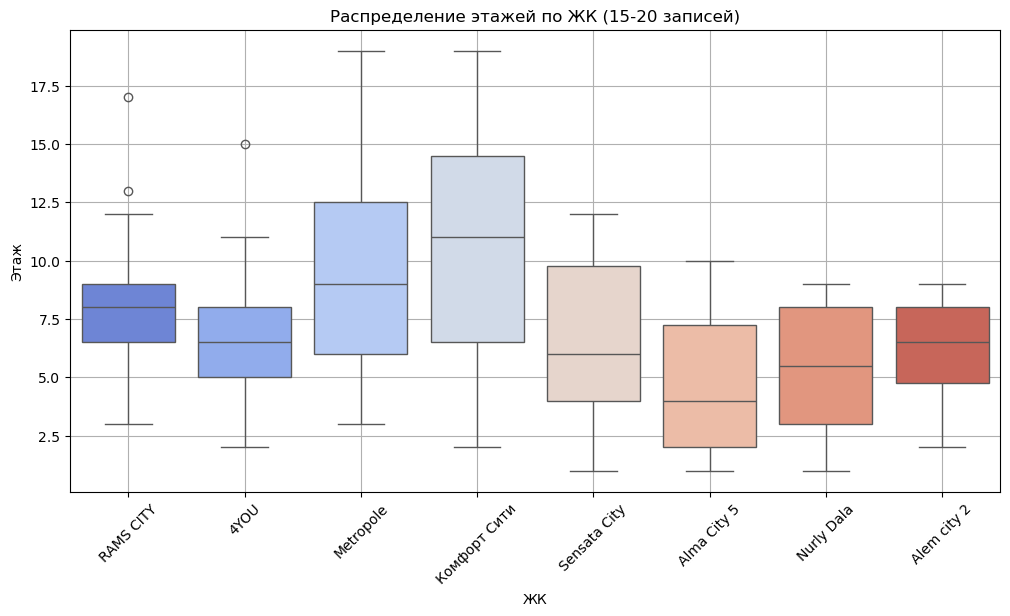

In [243]:
zhk_counts = all_houses['Zhk'].value_counts()

# Фильтруем ЖК, которые имеют от 15 до 20 записей
zhk_filtered = zhk_counts[(zhk_counts >= 20) & (zhk_counts <= 30)].index

# Отбираем данные только для выбранных ЖК
filtered_data = all_houses[all_houses['Zhk'].isin(zhk_filtered)]

# Построение boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=filtered_data, x='Zhk', y='Efloor', palette='coolwarm')
plt.title('Распределение этажей по ЖК (15-20 записей)')
plt.xlabel('ЖК')
plt.ylabel('Этаж')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

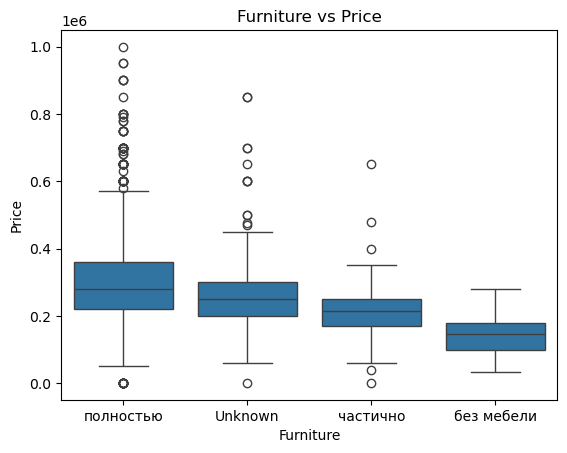

In [307]:
sns.boxplot(x='Furniture', y='Price', data=all_houses)
plt.title('Furniture vs Price')
plt.show()

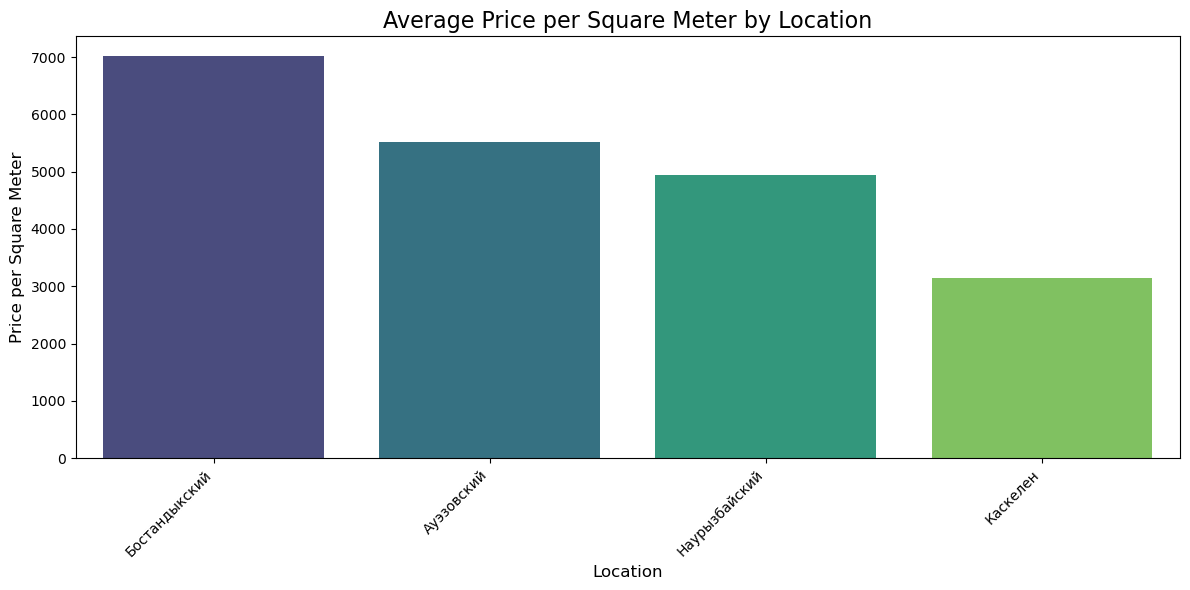

In [309]:
import matplotlib.pyplot as plt
import seaborn as sns


def clean_location(location):
    if "Алматы, Бостандыкский р-н\nпоказать на карте" in location:
        return "Бостандыкский"
    elif "Каскелен, Алматинская обл.\nпоказать на карте" in location:
        return "Каскелен"
    elif "Алматы, Ауэзовский р-н\nпоказать на карте" in location:
        return "Ауэзовский"
    elif "Алматы, Наурызбайский р-н\nпоказать на карте" in location:
        return "Наурызбайский"
    else:
        return "Другой"

all_houses['Location'] = all_houses['Location'].apply(clean_location)
all_houses['Price_per_sqm'] = all_houses['Price'] / all_houses['Area']

location_price = all_houses.groupby('Location')['Price_per_sqm'].mean().reset_index()

location_price = location_price.sort_values(by='Price_per_sqm', ascending=False)


plt.figure(figsize=(12, 6))
sns.barplot(x='Location', y='Price_per_sqm', data=location_price, palette='viridis')
plt.title('Average Price per Square Meter by Location', fontsize=16)
plt.xlabel('Location', fontsize=12)
plt.ylabel('Price per Square Meter', fontsize=12)
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()
plt.show()

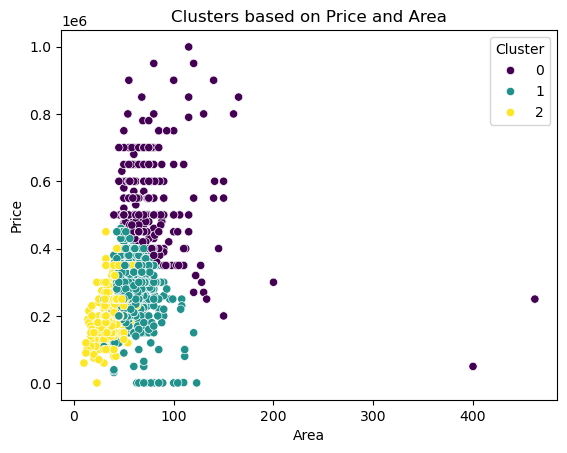

In [329]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(all_houses[['Price', 'Area', 'Room']])

kmeans = KMeans(n_clusters=3, random_state=42)
all_houses['Cluster'] = kmeans.fit_predict(X_scaled)

sns.scatterplot(x='Area', y='Price', hue='Cluster', data=all_houses, palette='viridis')
plt.title('Clusters based on Price and Area')
plt.show()